# Dependencies

In [1]:
from itertools import combinations, permutations, combinations_with_replacement, product
import itertools
import pandas
import numpy 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy 
from fractions import Fraction
import matplotlib.pyplot as plt
import statsmodels.api as sm
# also uses Cython 



# Creating the following combinations and permutations:

We will be employing permutations and combinations with replacements in our analysis due to the significance of element order and the presence of duplicates. However, it's important to note that for winning sample lengths greater than 3, the conventional permutations and combinations become inapplicable. This is because, for winning sample lengths up to 3, we only deal with unique elements.

For permutation with replacement, the formula is $n^r$, where $n$ represents the number of items in the list, and $r$ indicates the number of selections allowed for each item. On the other hand, combination with replacement refers to selecting an item multiple times from an unordered list. The formula for combination with replacement is $\binom{n + k - 1}{k}$, where $n$ denotes the number of items in the list, and $k$ signifies the permissible number of selections for each item.

In the context of **Combinations** and **Permutations** with <span style="color:red">replacement </span> for **Winning Sample Sets (1 to 13)**, we'll explore the following aspects:

- Probability Configurations: `{18/38, 18/38, 2/38}`
- Color Options: `{red, black, green}`
- Reset Scenarios: `{After X Number of Wins, After Y Number of Losses}`
    - Adjustments by X% / Y% following the Nth Win/Loss `{Incrementing in 0.5% increments, capped at 100%}`
        - Association with Profit Loss Ratios tied to the Nth wager


In [2]:
%%time
import slot_probabilities

# Calculate lengths and elements for the range from 1 to 15 using Cython
sample_range, lengths, elements = slot_probabilities.calculate_lengths_cython(1, 15)

CPU times: user 19 s, sys: 1.29 s, total: 20.3 s
Wall time: 20.2 s


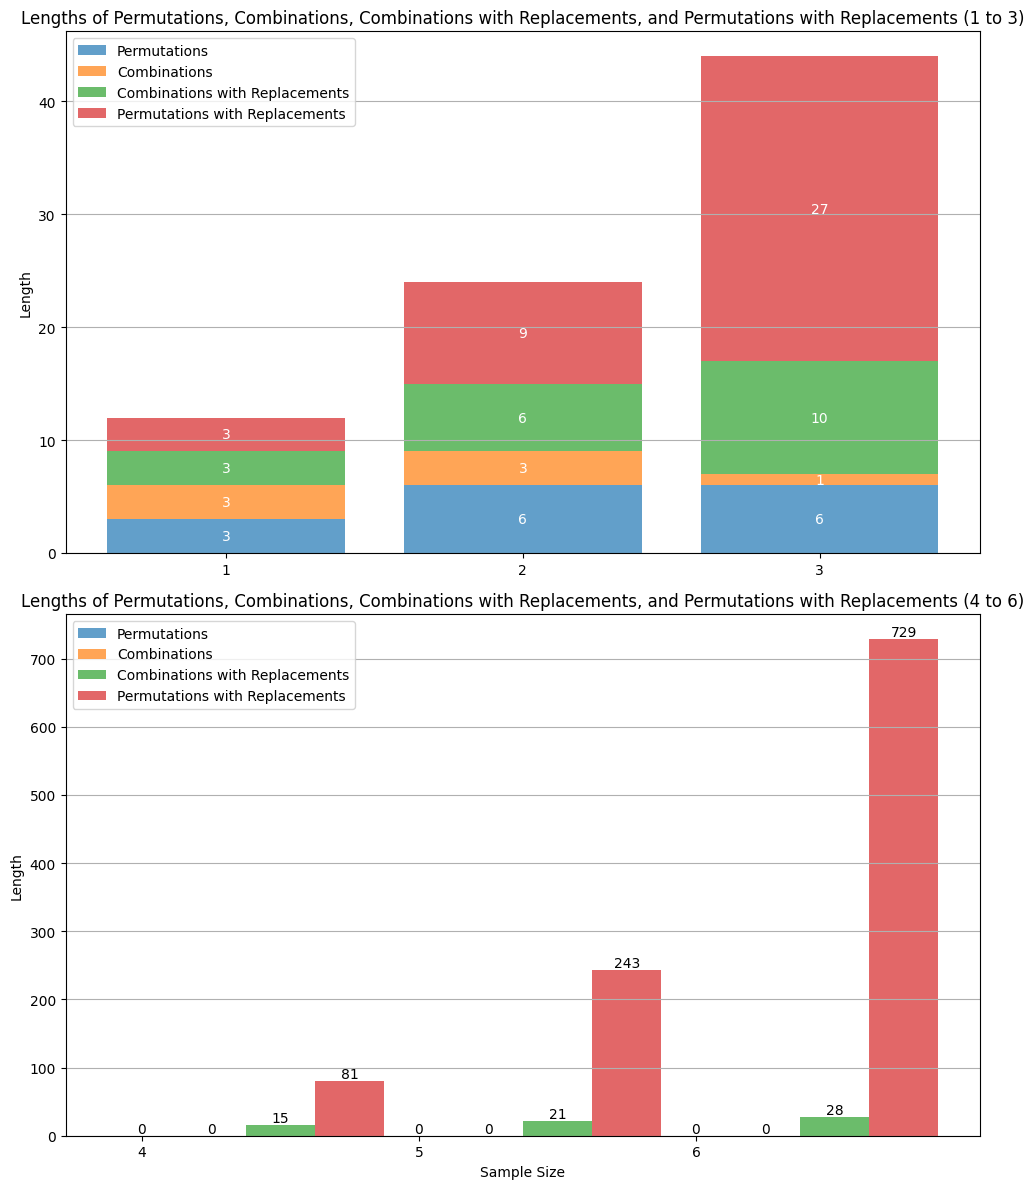

In [3]:
# Extract data for the first plot (1 to 3)
index_1_to_3 = sample_range.index(1)
index_1_to_4 = sample_range.index(4)
sample_range_1_to_3 = sample_range[index_1_to_3:index_1_to_4]
lengths_1_to_3 = lengths[index_1_to_3:index_1_to_4]

# Extract data for the second plot (4 to 6)
index_4_to_6 = sample_range.index(6) + 1
sample_range_4_to_6 = sample_range[index_1_to_4:index_4_to_6]
lengths_4_to_6 = lengths[index_1_to_4:index_4_to_6]


# Create the subplot layout (2 rows, 1 column)
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# First row - range from 1 to 3
bottom_offset = [0] * len(sample_range_1_to_3)
for i, category in enumerate(['Permutations', 'Combinations', 'Combinations with Replacements', 'Permutations with Replacements']):
    axs[0].bar(sample_range_1_to_3, [length[i] for length in lengths_1_to_3], bottom=bottom_offset, label=category, align='center', alpha=0.7)
    for j, length in enumerate(lengths_1_to_3):
        axs[0].text(sample_range_1_to_3[j], bottom_offset[j] + length[i] / 2, str(length[i]), ha='center', va='center', color='white')
        bottom_offset[j] += length[i]

axs[0].set_ylabel('Length')
axs[0].set_title('Lengths of Permutations, Combinations, Combinations with Replacements, and Permutations with Replacements (1 to 3)')
axs[0].legend()
axs[0].grid(axis='y')

# Hide subticks on the x-axis for the first subplot
axs[0].xaxis.set_major_locator(plt.MultipleLocator(1))
axs[0].xaxis.set_minor_locator(plt.NullLocator())

# Second row - range from 4 to 6
bar_width = 0.25
bottom_offset = [0] * len(sample_range_4_to_6)
for i, category in enumerate(['Permutations', 'Combinations', 
                              'Combinations with Replacements', 'Permutations with Replacements']):
    x_positions = [pos + bar_width * i for pos in range(len(sample_range_4_to_6))]
    axs[1].bar(x_positions, [length[i] for length in lengths_4_to_6], label=category, align='center', alpha=0.7, width=bar_width)
    for x_pos, length in zip(x_positions, lengths_4_to_6):
        axs[1].text(x_pos, length[i], str(length[i]), ha='center', va='bottom', color='black')
        bottom_offset = [max(offset, length[i]) for offset in bottom_offset]

axs[1].set_xticks(range(len(sample_range_4_to_6)))
axs[1].set_xticklabels(sample_range_4_to_6)
axs[1].set_xlabel('Sample Size')
axs[1].set_ylabel('Length')
axs[1].set_title('Lengths of Permutations, Combinations, Combinations with Replacements, and Permutations with Replacements (4 to 6)')
axs[1].legend()
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()